<a href="https://colab.research.google.com/github/HwayoungYoon/opendata_intern_2022/blob/main/%EC%97%AC%EC%A3%BC%EC%8B%9C_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%98%84%ED%99%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 설정

In [113]:
# 한글 깨짐 해결을 위한 설치
# ❗ 다시 실행할 필요 없음
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 71 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,187 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
!pip install selenium
#코랩에서 구글드라이버 연동
!apt-get update
!apt install chromium-chromedriver
#패키지 호출

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.n

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.keys import Keys
from urllib.request import urlopen
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import time
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# 마이너스 부호 깨짐 현상
plt.rcParams['axes.unicode_minus'] = False
# 한글폰트 전역 설정
plt.rcParams["font.family"] = 'NanumBarunGothic'

In [4]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver', options=chrome_options)

# 크롤링

In [7]:
url = 'https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=FILE&keyword=%EC%97%AC%EC%A3%BC%EC%8B%9C&detailKeyword=&publicDataPk=&recmSe=N&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=&sort=_score&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=1&perPage=100&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode='
driver.get(url)

In [8]:
#클릭한후에 전체 html 가지고 와서, answer가 있는 q부문과 a가 있는 부문을 가지고 온다.
#여기서는 question/answer 가  class로 지정되어 있어 그대로 가지고 온다. 
#answer는 클릭해야만 나오기 때문에, 여기서는 위에 한번만 클릭해서 1개만 가지고 온다.
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')
title = soup.find_all(class_="title")
desc = soup.find_all(class_="ellipsis publicDataDesc")
labelset = soup.find_all(class_="labelset brown")
data = soup.find_all(class_="data")

#마지막으로 텍스트만 가지고 와서 리스트에 추가한다.
titles = []
descs = []
labelsets = []
datas = []
for n in title:
    titles.append(n.get_text())
for m in desc:
    descs.append(m.get_text())
for r in labelset:
    labelsets.append(r.get_text())
for s in data:
    datas.append(s.get_text())

In [9]:
del datas[20]
del datas[29-1]
del datas[58-2]
del datas[67-3]
del datas[88-4]
del datas[129-5]
del datas[190-6]
del datas[215-7]
del datas[220-8]

In [10]:
nums = pd.DataFrame()
for i in np.arange(0, len(datas), 4):
  df = pd.DataFrame(datas[i:i+4]).T
  nums = pd.concat([nums, df], ignore_index=True)

In [11]:
titles = pd.DataFrame(titles[7:70])
descs = pd.DataFrame(descs)
labelsets = pd.DataFrame(labelsets)

In [12]:
yeoju = pd.concat([titles, descs, labelsets, nums], axis=1)
yeoju.columns = ['데이터','설명','분류','제공기관','수정일','조회수','다운로드']

In [13]:
yeoju = yeoju.astype('str')

In [14]:
yeoju['데이터'] = yeoju['데이터'].str.replace('\n','')
yeoju['데이터'] = yeoju['데이터'].str.replace('\t','')
yeoju['설명'] = yeoju['설명'].str.replace('\n','')
yeoju['설명'] = yeoju['설명'].str.replace('\t','')
yeoju['제공기관'] = yeoju['제공기관'].str.replace('\n','')
yeoju['제공기관'] = yeoju['제공기관'].str.replace('\t','')
yeoju['조회수'] = yeoju['조회수'].str.replace('\n','')
yeoju['조회수'] = yeoju['조회수'].str.replace('\t','')

In [15]:
yeoju = yeoju.drop('수정일', axis=1)
yeoju = yeoju.drop([61,62])

In [16]:
yeoju['확장자'] = 'CSV, JSON+XML'
yeoju.loc[0,'확장자'] = 'XLS'
yeoju.loc[1,'확장자'] = 'XLS'
yeoju.loc[14,'확장자'] = 'XLSX'
yeoju.loc[27,'확장자'] = 'XLS'

In [17]:
yeoju = yeoju.astype({'조회수':'int'})
yeoju = yeoju.astype({'다운로드':'int'})

In [19]:
yeoju

,데이터,설명,분류,제공기관,조회수,다운로드,확장자
0,경기도 여주시_주민등록 인구통계,"여주시 주민등록 인구 현황 자료 데이터 입니다. 주요제공항목으로는 읍면동별, 연령별...",공공행정,경기도 여주시,2328,8,XLS
1,경기도 여주시_기본통계 및 통계연보,"여주시 통계연보 데이터입니다.통계연보는 매년 1회 발행되며, 기준일은 전전년도 12...",공공행정,경기도 여주시,2075,23,XLS
2,경기도 여주시_장사시설,"경기도 여주시 장사시설 공공데이터입니다. 장사시설명, 운영구분, 시설구분, 소재지도...",사회복지,경기도 여주시,591,63,"CSV, JSON+XML"
3,경기도 여주시_경로당,"경기도 여주시 경로당 공공데이터입니다. 경로당명, 읍면동명, 행정리통, 소재지도로명...",사회복지,경기도 여주시,449,58,"CSV, JSON+XML"
4,경기도 여주시_공장등록,"여주시 관내 공장등록에 대한 현황 데이터를 제공합니다. 제공하는 항목으로는 회사명,...",산업고용,경기도 여주시,2592,935,"CSV, JSON+XML"
...,...,...,...,...,...,...,...
56,경기도 여주시_음식물류폐기물다량배출사업장현황,경기도 여주시의 음식물류 폐기물 다량배출 사업장 현황 데이터입니다.,환경기상,경기도 여주시,45,14,"CSV, JSON+XML"
57,경기도_여주시_토양 오염도검사 및 누출검사 대상현황,경기도 여주시 관내 사업장 중 토양 오염도검사 및 누출검사 대상현황 정보입니다. 사...,환경기상,경기도 여주시,1642,469,"CSV, JSON+XML"
58,경기도 여주시_화물자동차운송주선사업허가업체현황,"경기도 여주시의 화물자동차 운송주선사업 허가업체 현황 데이터입니다. 인허가일자, 인...",교통물류,경기도 여주시,41,12,"CSV, JSON+XML"
59,경기도 여주시_실내공기질관리법적용대상다중이용시설현황,경기도 여주시의 실내공기질관리법 적용대상 다중이용시설 현황 데이터입니다.,환경기상,경기도 여주시,49,18,"CSV, JSON+XML"


# 데이터 저장

In [70]:
# 구글 드라이브 접근 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
yeoju.to_csv('/content/drive/My Drive/yeoju.csv', index=False)

# EDA

## 조회수

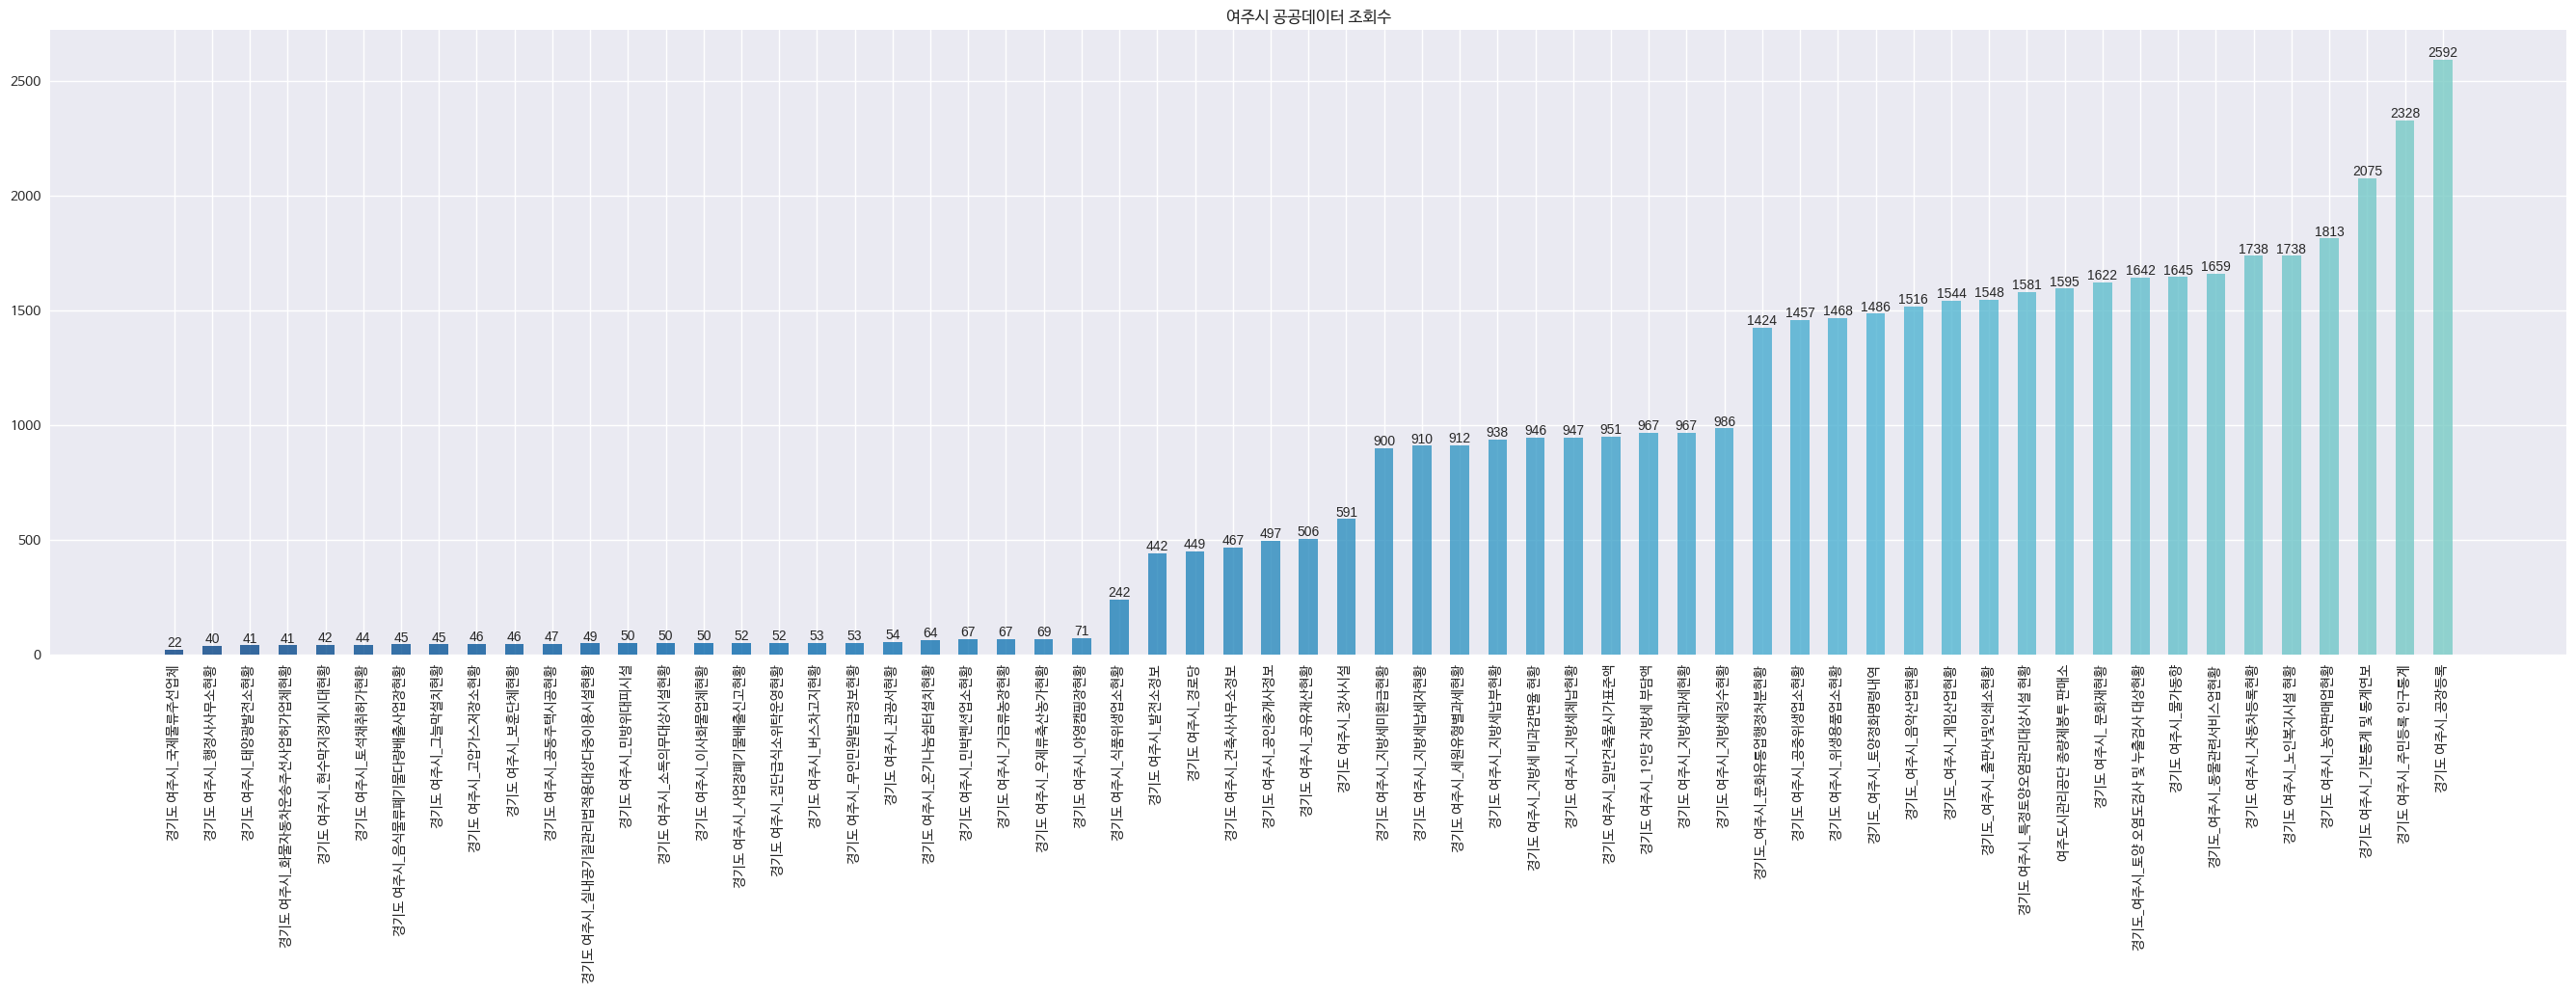

In [148]:
plt.rcParams["font.family"] = 'NanumBarunGothic'

df = yeoju.sort_values('조회수').reset_index(drop=True)
x = df['데이터']
y = df['조회수']

fig, ax = plt.subplots(figsize=(30,8))
colors = sns.color_palette('GnBu_r',len(x)*2)
plt.style.use('seaborn')
plt.xticks(rotation=90)
plt.title('여주시 공공데이터 조회수')
ax.bar(x, y, color=colors, alpha=0.8, width=0.5)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i], horizontalalignment='center', verticalalignment='bottom')

plt.show()

## 다운로드

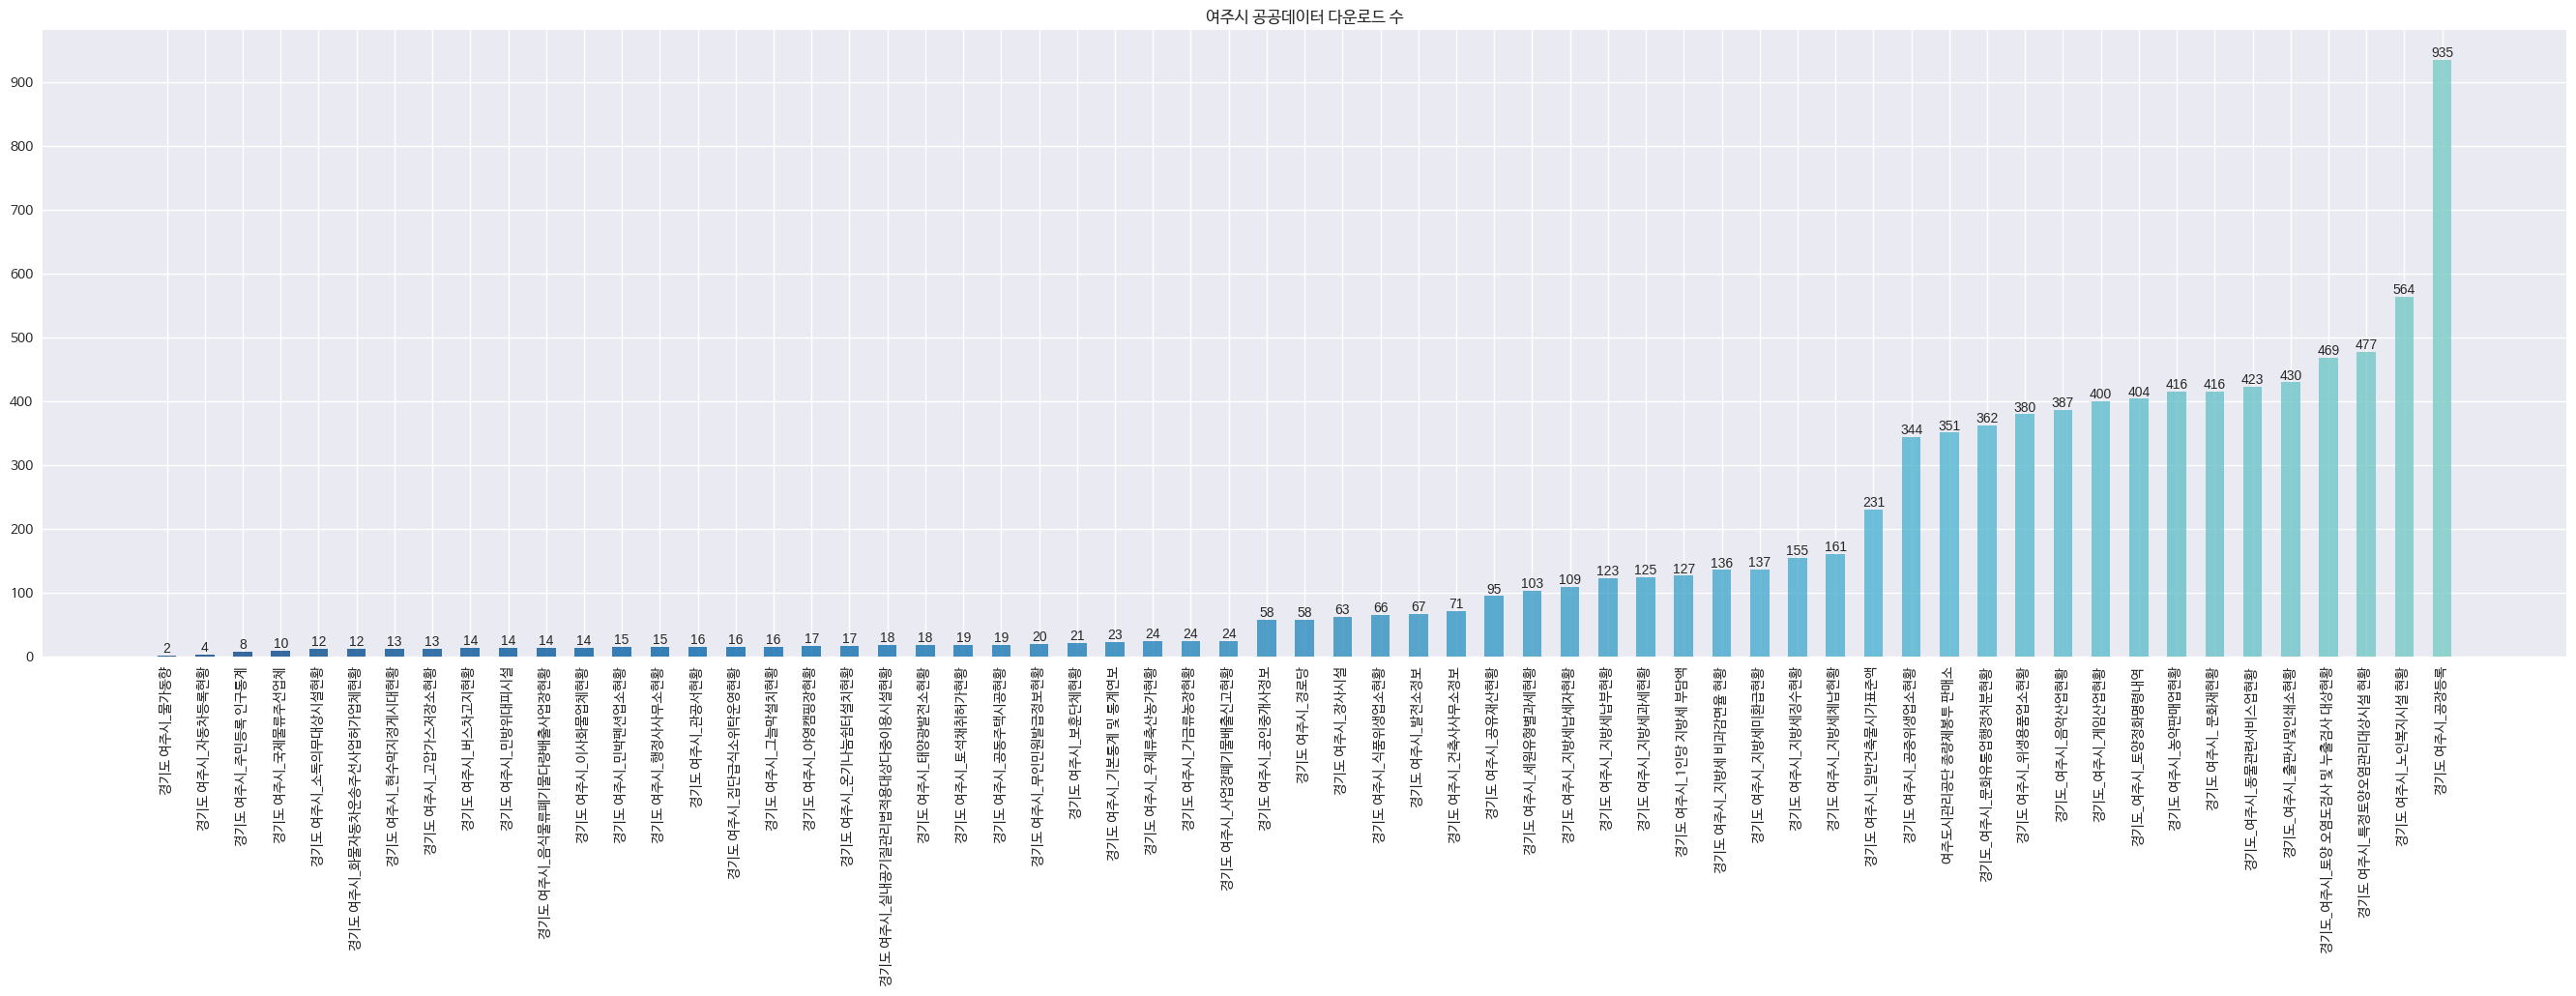

In [149]:
plt.rcParams["font.family"] = 'NanumBarunGothic'

df = yeoju.sort_values('다운로드').reset_index(drop=True)
x = df['데이터']
y = df['다운로드']

fig, ax = plt.subplots(figsize=(30,8))
colors = sns.color_palette('GnBu_r',len(x)*2)
plt.style.use('seaborn')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1000, 100))
plt.title('여주시 공공데이터 다운로드 수')
ax.bar(x, y, color=colors, alpha=0.8, width=0.5)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i], horizontalalignment='center', verticalalignment='bottom')

plt.show()

## 조회수 대비 다운로드

In [110]:
yeoju['다운로드/조회수'] = yeoju['다운로드']/yeoju['조회수']

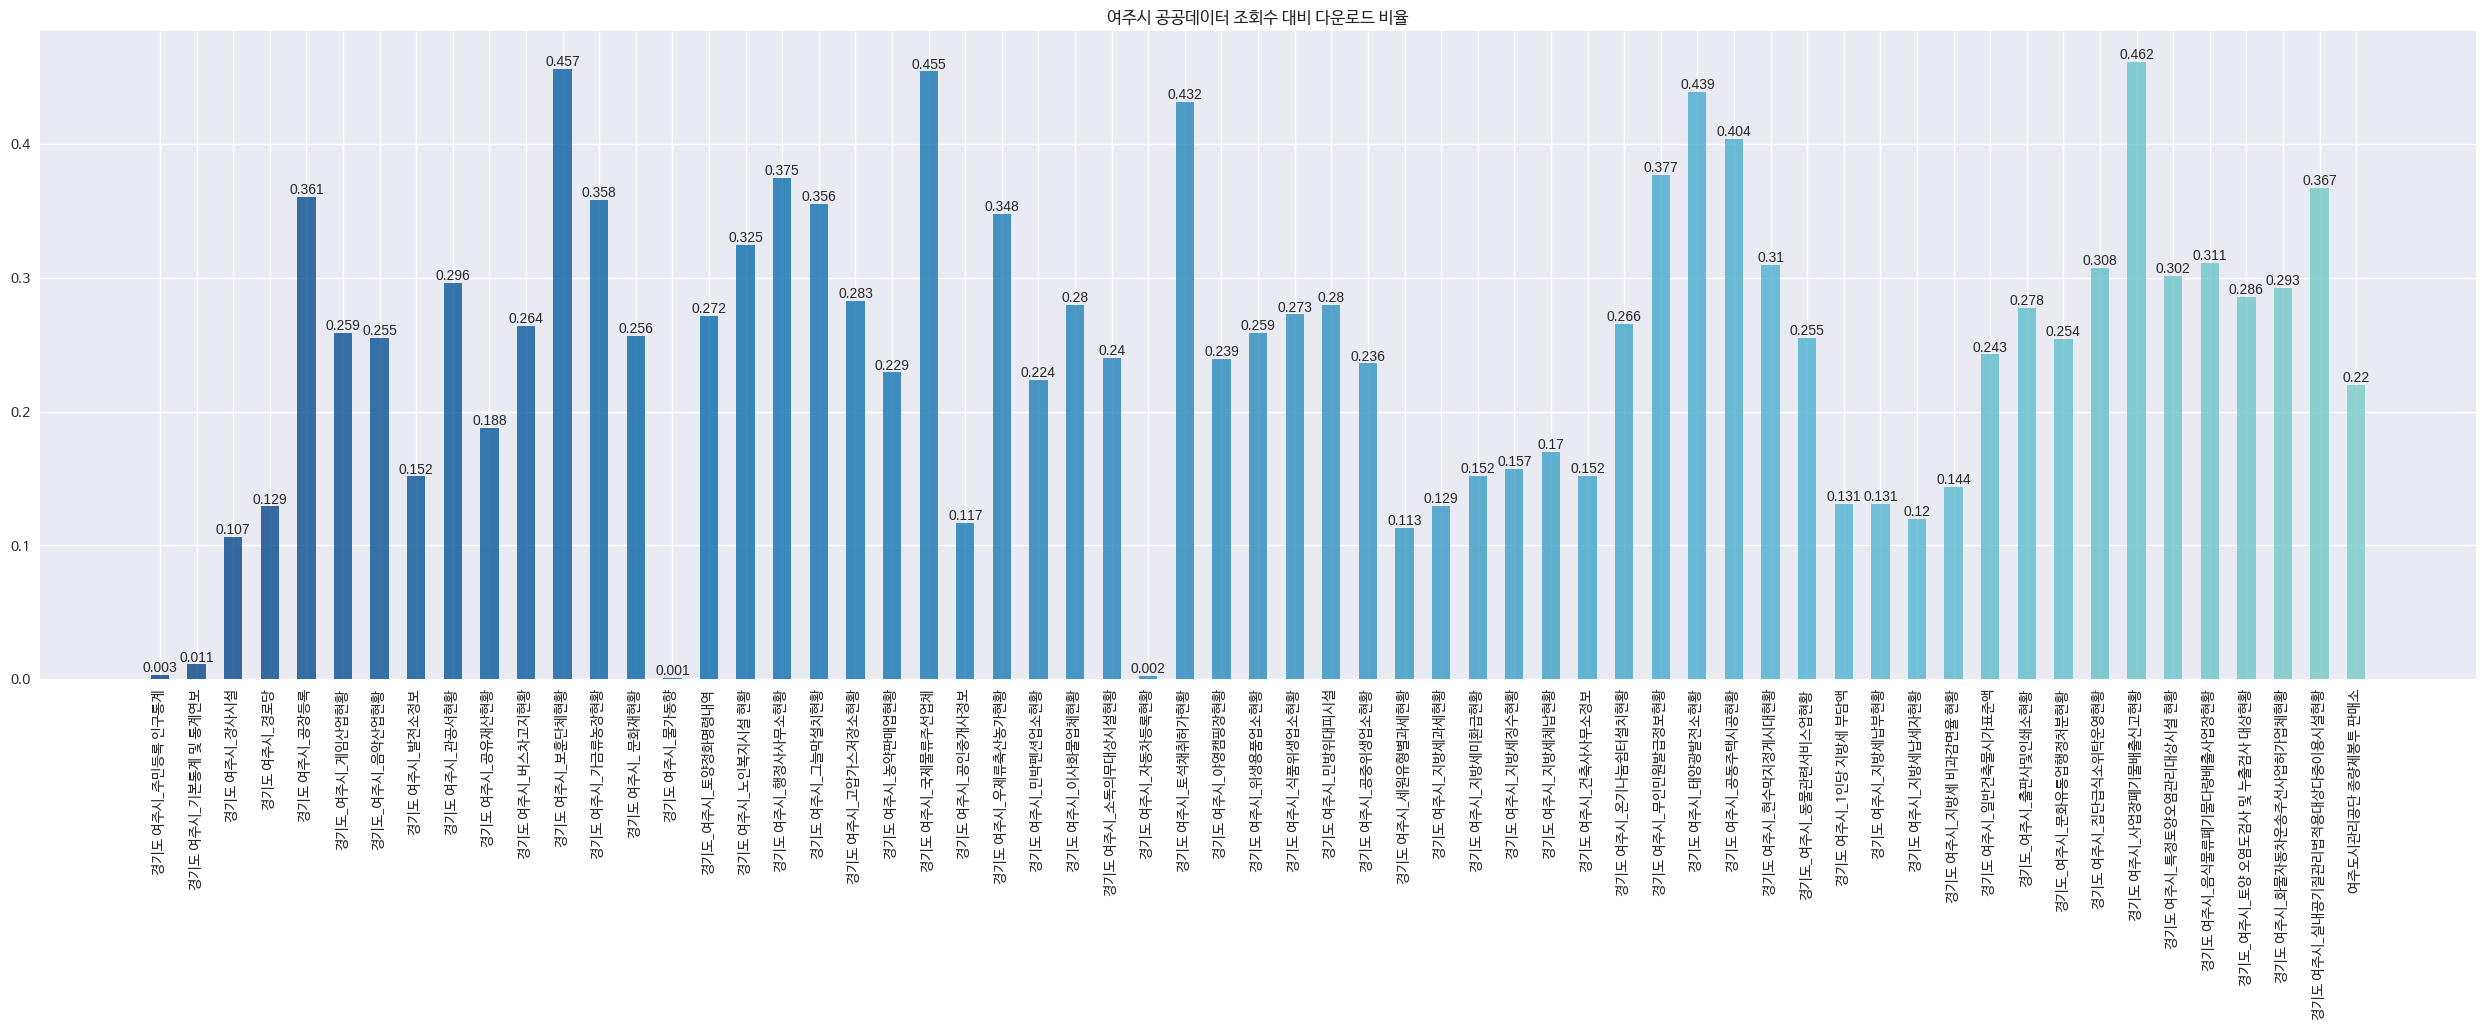

In [150]:
plt.rcParams["font.family"] = 'NanumBarunGothic'

x = yeoju['데이터']
y = yeoju['다운로드/조회수']

fig, ax = plt.subplots(figsize=(28,8))
colors = sns.color_palette('GnBu_r',len(x)*2)
plt.style.use('seaborn')
plt.xticks(rotation=90)
plt.title('여주시 공공데이터 조회수 대비 다운로드 비율')
ax.bar(x, y, color=colors, alpha=0.8, width=0.5)

for i, v in enumerate(x):
    plt.text(v, y[i], round(y[i],3), horizontalalignment='center', verticalalignment='bottom')

plt.show()

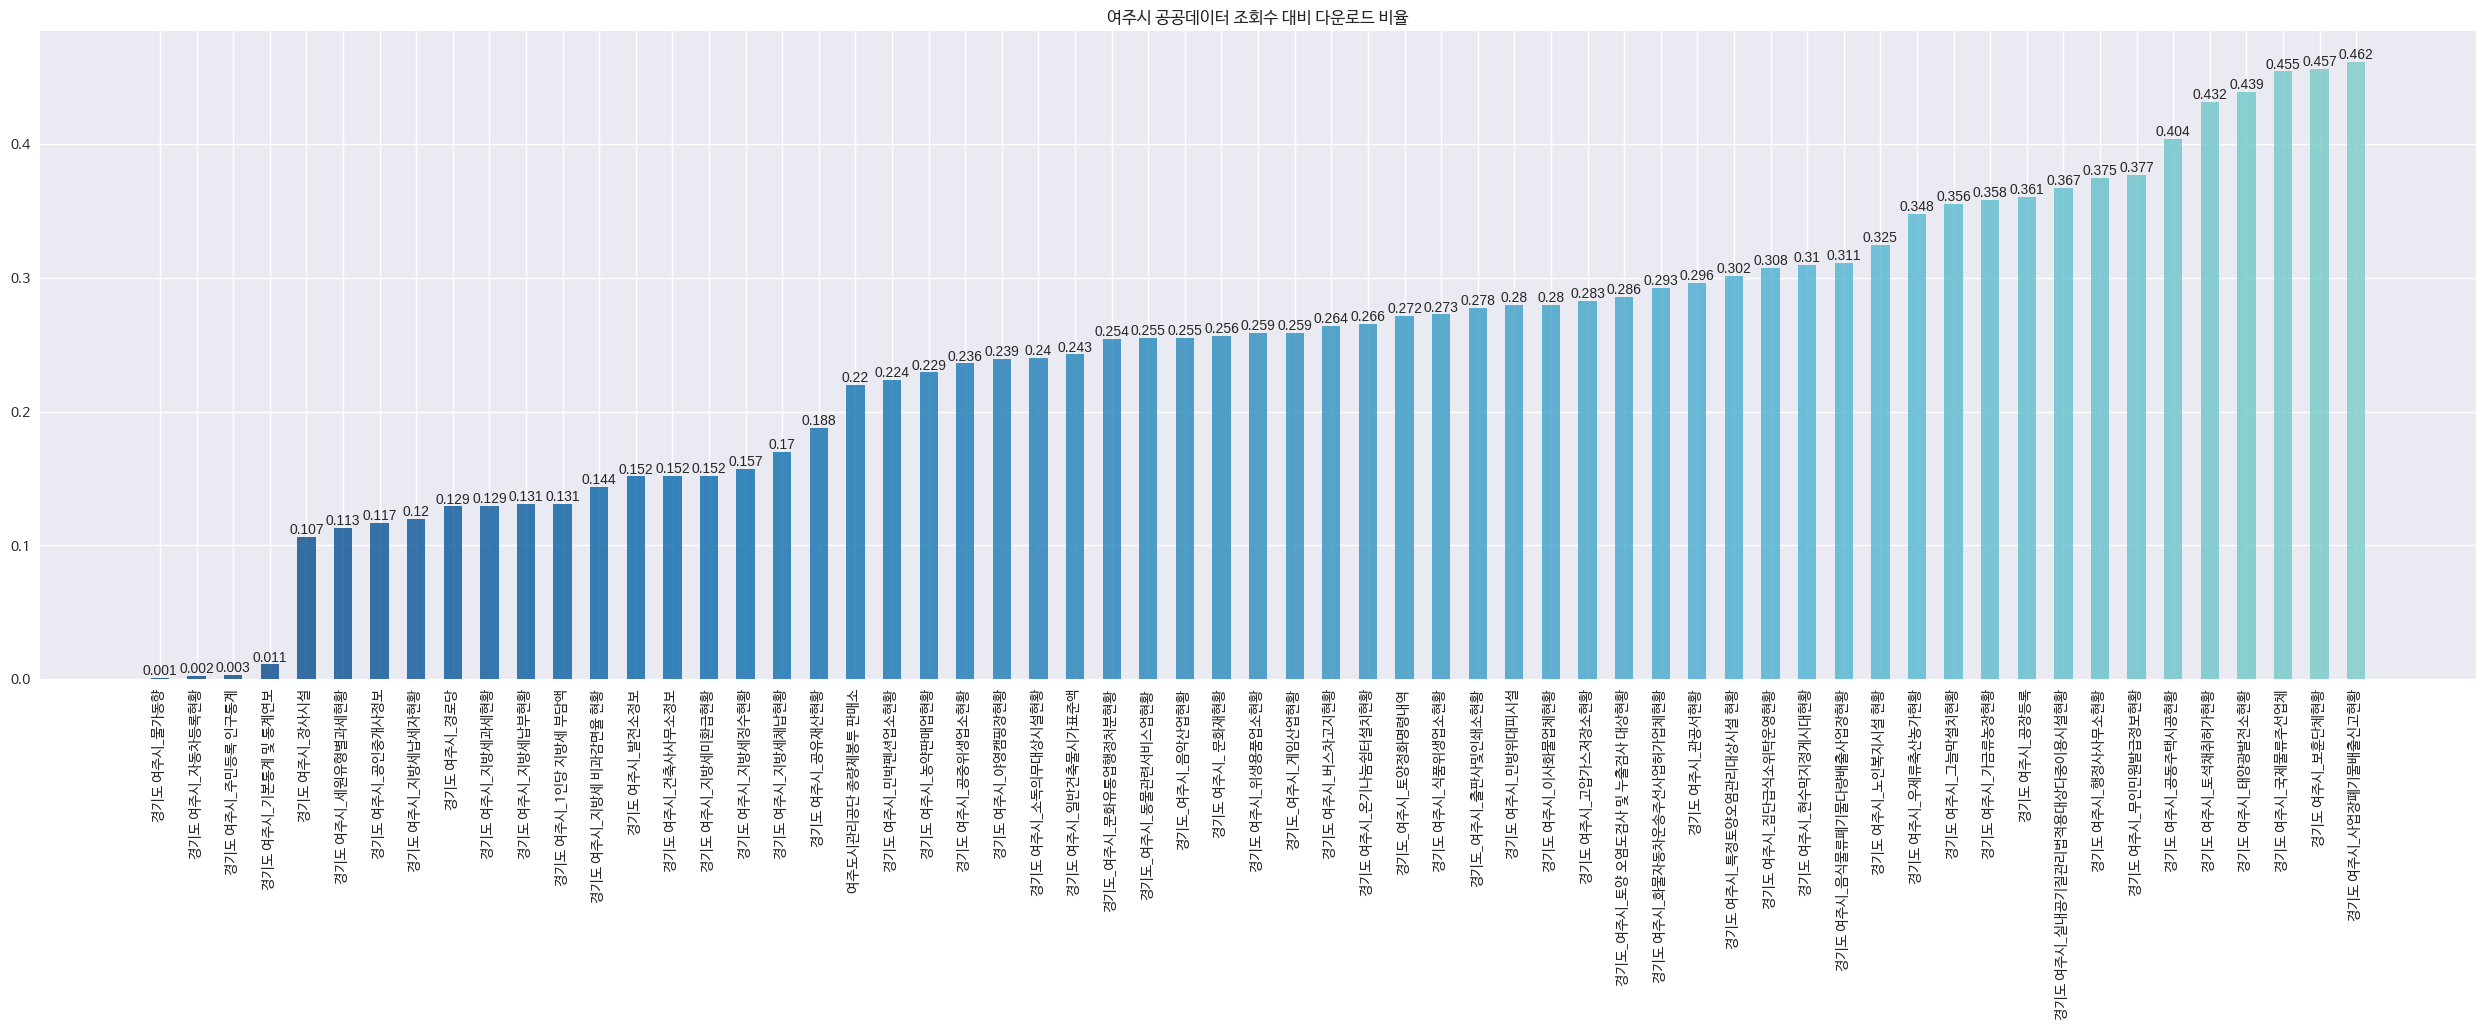

In [151]:
plt.rcParams["font.family"] = 'NanumBarunGothic'

df = yeoju.sort_values('다운로드/조회수').reset_index(drop=True)
x = df['데이터']
y = df['다운로드/조회수']

fig, ax = plt.subplots(figsize=(28,8))
colors = sns.color_palette('GnBu_r',len(x)*2)
plt.style.use('seaborn')
plt.xticks(rotation=90)
plt.title('여주시 공공데이터 조회수 대비 다운로드 비율')
ax.bar(x, y, color=colors, alpha=0.8, width=0.5)

for i, v in enumerate(x):
    plt.text(v, y[i], round(y[i],3), horizontalalignment='center', verticalalignment='bottom')

plt.show()

* 경기도 여주시_주민등록 인구통계 : https://www.data.go.kr/data/3065501/fileData.do
* 경기도 여주시_기본통계 및 통계연보 : https://www.data.go.kr/data/3065804/fileData.do
* 경기도 여주시_물가동향 : https://www.data.go.kr/data/3065493/fileData.do
* 경기도 여주시_자동차등록현황 : https://www.data.go.kr/data/3065502/fileData.do

> 4개의 데이터 전부 xls 또는 xlsx 확장자를 가짐
>
> 공공데이터포털에서 직접 다운을 받는게 아니라 여주시 홈페이지로 넘어가서 다운을 받는 구조로 사용자의 클릭 수가 늘어나 다운로드 횟수에 부정적인 영향을 끼침

## 분류체계별 데이터 개수

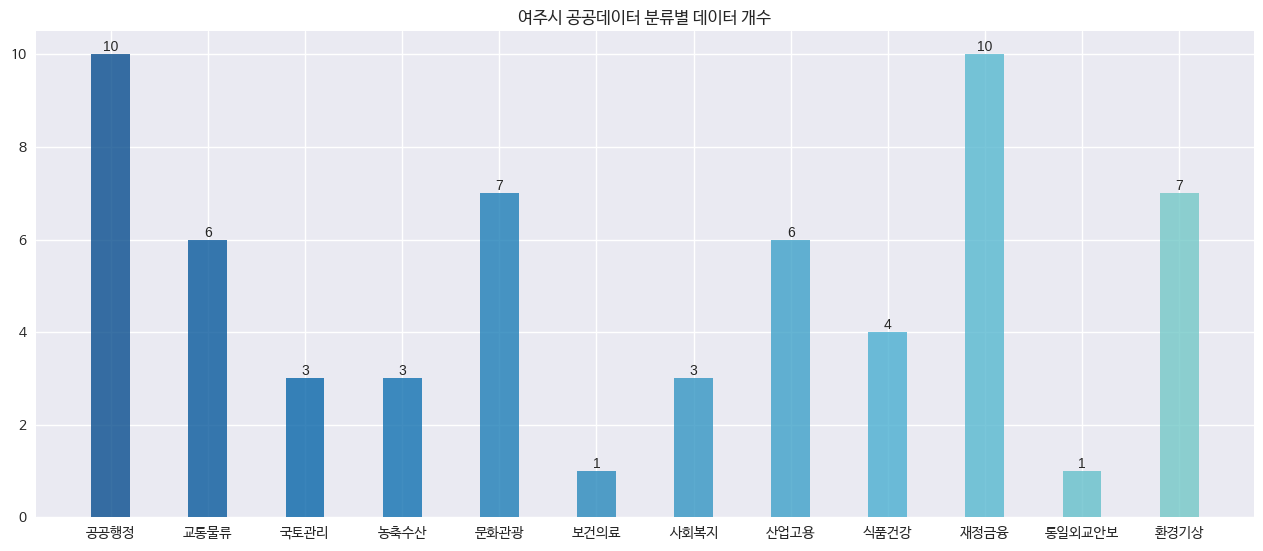

In [152]:
plt.rcParams["font.family"] = 'NanumBarunGothic'

x = yeoju.groupby('분류').size().index.tolist()
y = yeoju.groupby('분류').size()

fig, ax = plt.subplots(figsize=(14,6))
colors = sns.color_palette('GnBu_r',len(x)*2)
plt.style.use('seaborn')
plt.title('여주시 공공데이터 분류별 데이터 개수')
ax.bar(x, y, color=colors, alpha=0.8, width=0.4)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i], horizontalalignment='center', verticalalignment='bottom')

plt.show()

* 경기도 여주시_소독의무대상시설현황 : https://www.data.go.kr/data/15100816/fileData.do
* 경기도 여주시_민방위대피시설 : https://www.data.go.kr/data/15101033/fileData.do

> 왜 보건의료와 통일외교안보로 분류되는 데이터가 적을까

## 확장자별 데이터 개수

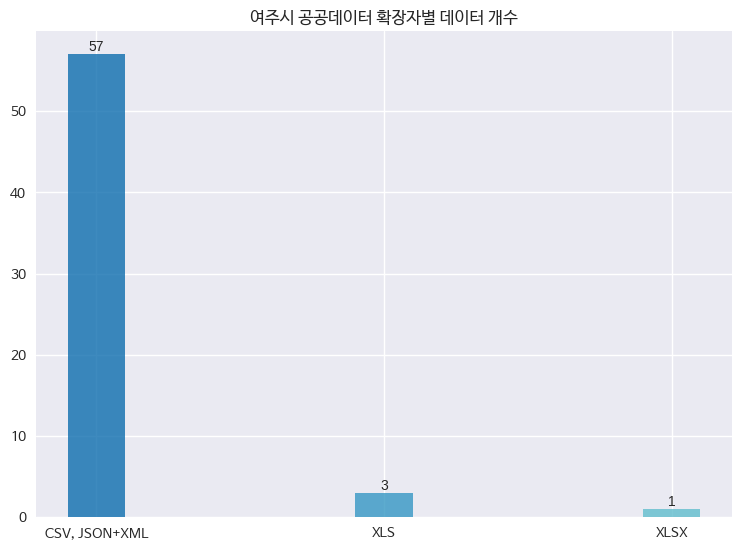

In [153]:
plt.rcParams["font.family"] = 'NanumBarunGothic'

x = yeoju.groupby('확장자').size().index.tolist()
y = yeoju.groupby('확장자').size()

fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette('GnBu_r',len(x)*2)
plt.style.use('seaborn')
plt.title('여주시 공공데이터 확장자별 데이터 개수')
ax.bar(x, y, color=colors, alpha=0.8, width=0.2)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i], horizontalalignment='center', verticalalignment='bottom')

plt.show()

## 조회수, 다운로드

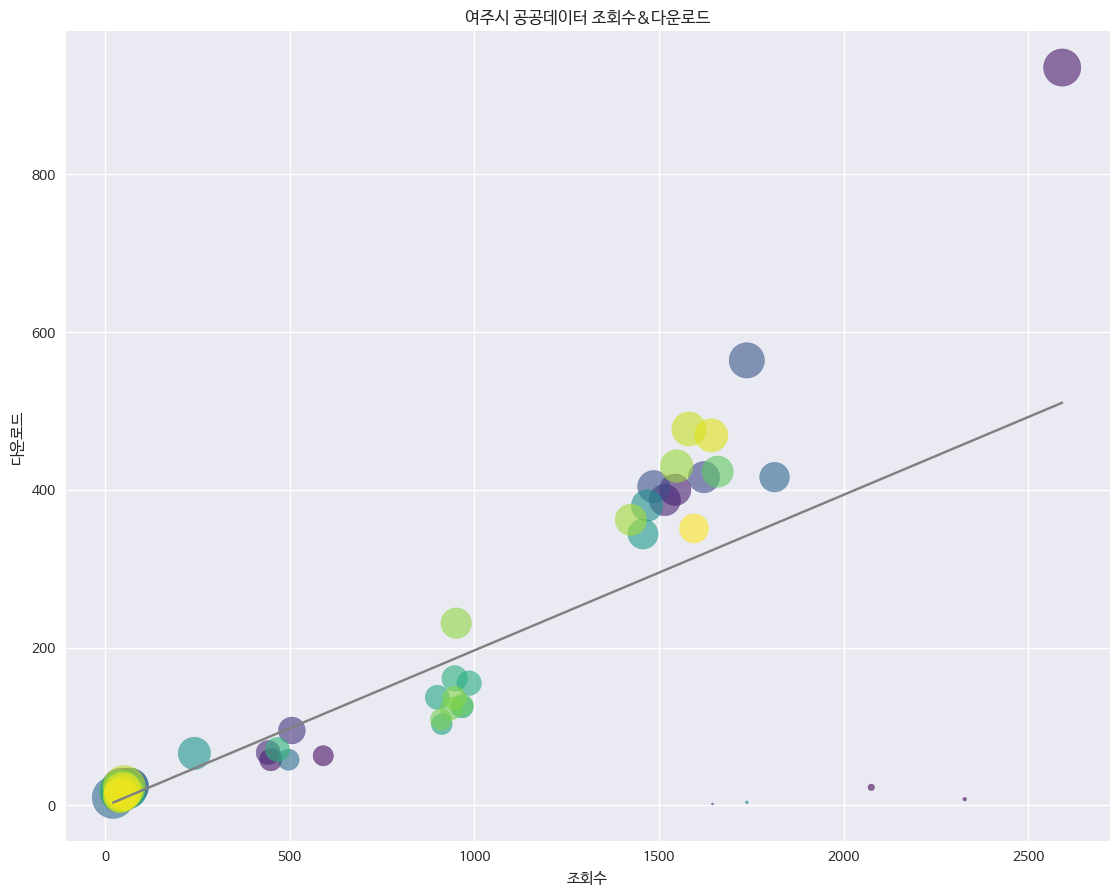

In [212]:
plt.rcParams["font.family"] = 'NanumBarunGothic'

x = yeoju['조회수']
y = yeoju['다운로드']
area = yeoju['다운로드/조회수']*2000

fit_line = np.polyfit(x, y, 1)
x_minmax = np.array([min(x), max(x)])
fit_y = x_minmax * fit_line[0] + fit_line[1]

fig, ax = plt.subplots(figsize=(12,10))
plt.style.use('seaborn')
plt.title('여주시 공공데이터 조회수&다운로드')
plt.xlabel('조회수')
plt.ylabel('다운로드')
ax.scatter(x, y, s=area, c=range(len(x)), alpha=0.6, cmap='viridis')
ax.plot(x_minmax, fit_y, color='gray')

plt.show()

In [181]:
yeoju_sort = pd.DataFrame()
yeoju_sort['조회수'] = yeoju.sort_values('조회수')['데이터'].reset_index(drop=True)
yeoju_sort['다운로드'] = yeoju.sort_values('다운로드')['데이터'].reset_index(drop=True)
yeoju_sort['다운로드/조회수'] = yeoju.sort_values('다운로드/조회수')['데이터'].reset_index(drop=True)
yeoju_sort

,조회수,다운로드,다운로드/조회수
0,경기도 여주시_국제물류주선업체,경기도 여주시_물가동향,경기도 여주시_물가동향
1,경기도 여주시_행정사사무소현황,경기도 여주시_자동차등록현황,경기도 여주시_자동차등록현황
2,경기도 여주시_태양광발전소현황,경기도 여주시_주민등록 인구통계,경기도 여주시_주민등록 인구통계
3,경기도 여주시_화물자동차운송주선사업허가업체현황,경기도 여주시_국제물류주선업체,경기도 여주시_기본통계 및 통계연보
4,경기도 여주시_현수막지정게시대현황,경기도 여주시_소독의무대상시설현황,경기도 여주시_장사시설
...,...,...,...
56,경기도 여주시_노인복지시설 현황,경기도_여주시_출판사및인쇄소현황,경기도 여주시_토석채취허가현황
57,경기도 여주시_농약판매업현황,경기도_여주시_토양 오염도검사 및 누출검사 대상현황,경기도 여주시_태양광발전소현황
58,경기도 여주시_기본통계 및 통계연보,경기도 여주시_특정토양오염관리대상시설 현황,경기도 여주시_국제물류주선업체
59,경기도 여주시_주민등록 인구통계,경기도 여주시_노인복지시설 현황,경기도 여주시_보훈단체현황


In [183]:
yeoju_sort[yeoju_sort['조회수'] == yeoju_sort['다운로드']]

,조회수,다운로드,다운로드/조회수
29,경기도 여주시_공인중개사정보,경기도 여주시_공인중개사정보,경기도 여주시_ 문화재현황
31,경기도 여주시_장사시설,경기도 여주시_장사시설,경기도_여주시_게임산업현황
60,경기도 여주시_공장등록,경기도 여주시_공장등록,경기도 여주시_사업장폐기물배출신고현황
